# **Aula 22 - Integração Numérica com Python**

## Exemplo 1

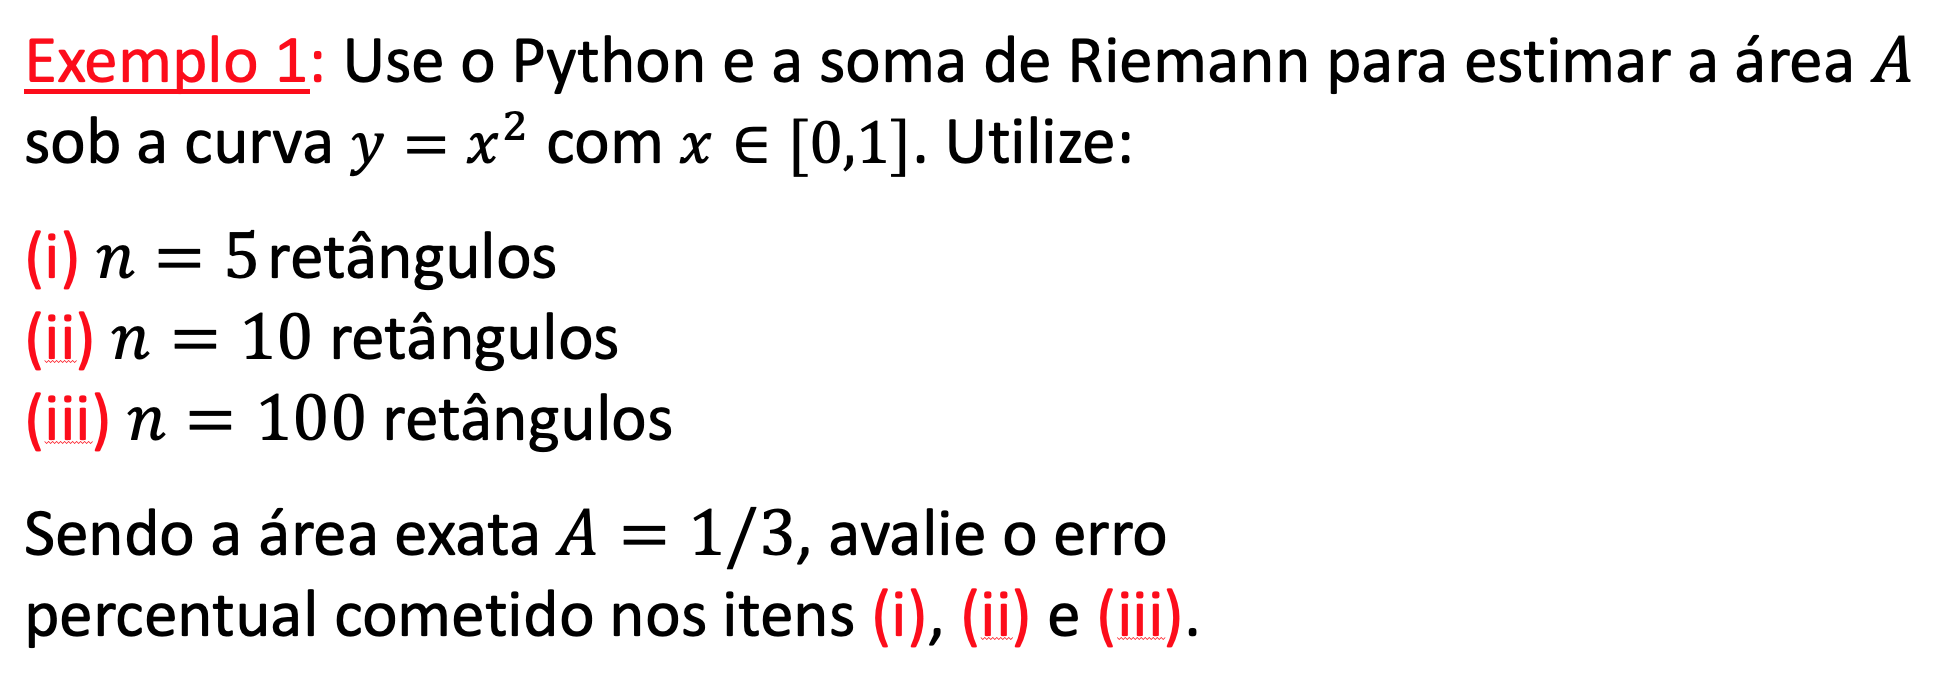

### Método matemático

In [ ]:
import numpy as np
import pandas as pd

# Função que representa a curva y = x^2
def f(x):
    return x**2

# Função para calcular a área usando soma de Riemann
def soma_riemann(f, a, b, n):
    # Dividindo o intervalo [a, b] em n subintervalos de tamanho dx
    dx = (b - a) / n
    x = np.linspace(a, b - dx, n)  # Pontos à esquerda de cada retângulo
    return np.sum(f(x) * dx)

# Parâmetros
a, b = 0, 1  # Intervalo de integração
n_values = [5, 10, 100]  # Quantidades de retângulos
area_exata = 1/3  # Área exata sob a curva

# Calculando a área e o erro percentual para cada valor de n
resultados = []
for n in n_values:
    area_aproximada = soma_riemann(f, a, b, n)
    erro_percentual = abs((area_aproximada - area_exata) / area_exata) * 100
    resultados.append((n, area_aproximada, erro_percentual))

# Criando DataFrame para exibir os resultados
df_resultados = pd.DataFrame(resultados, columns=['n (retângulos)', 'Área Aproximada', 'Erro Percentual (%)'])

# Exibindo os resultados
print(df_resultados)

   n (retângulos)  Área Aproximada  Erro Percentual (%)
0               5          0.24000               28.000
1              10          0.28500               14.500
2             100          0.32835                1.495


### Usando o SciPy

In [ ]:
from scipy.integrate import quad

# Definindo a função
def f(x):
    return x**2

# Calculando a integral usando a função `quad`
area, _ = quad(f, 0, 1)  # Integra a função f no intervalo [0, 1]
print(f"Área calculada com SciPy: {area:.5f}")

Área calculada com SciPy: 0.33333


### Usando o SymPy

In [ ]:
from sympy import Symbol, integrate

# Definindo a variável e a função
x = Symbol('x')
f = x**2

# Calculando a integral de forma simbólica
area = integrate(f, (x, 0, 1))  # Intervalo de 0 a 1
print(f"Área exata com SymPy: {area}")

Área exata com SymPy: 1/3


## Exemplo 02

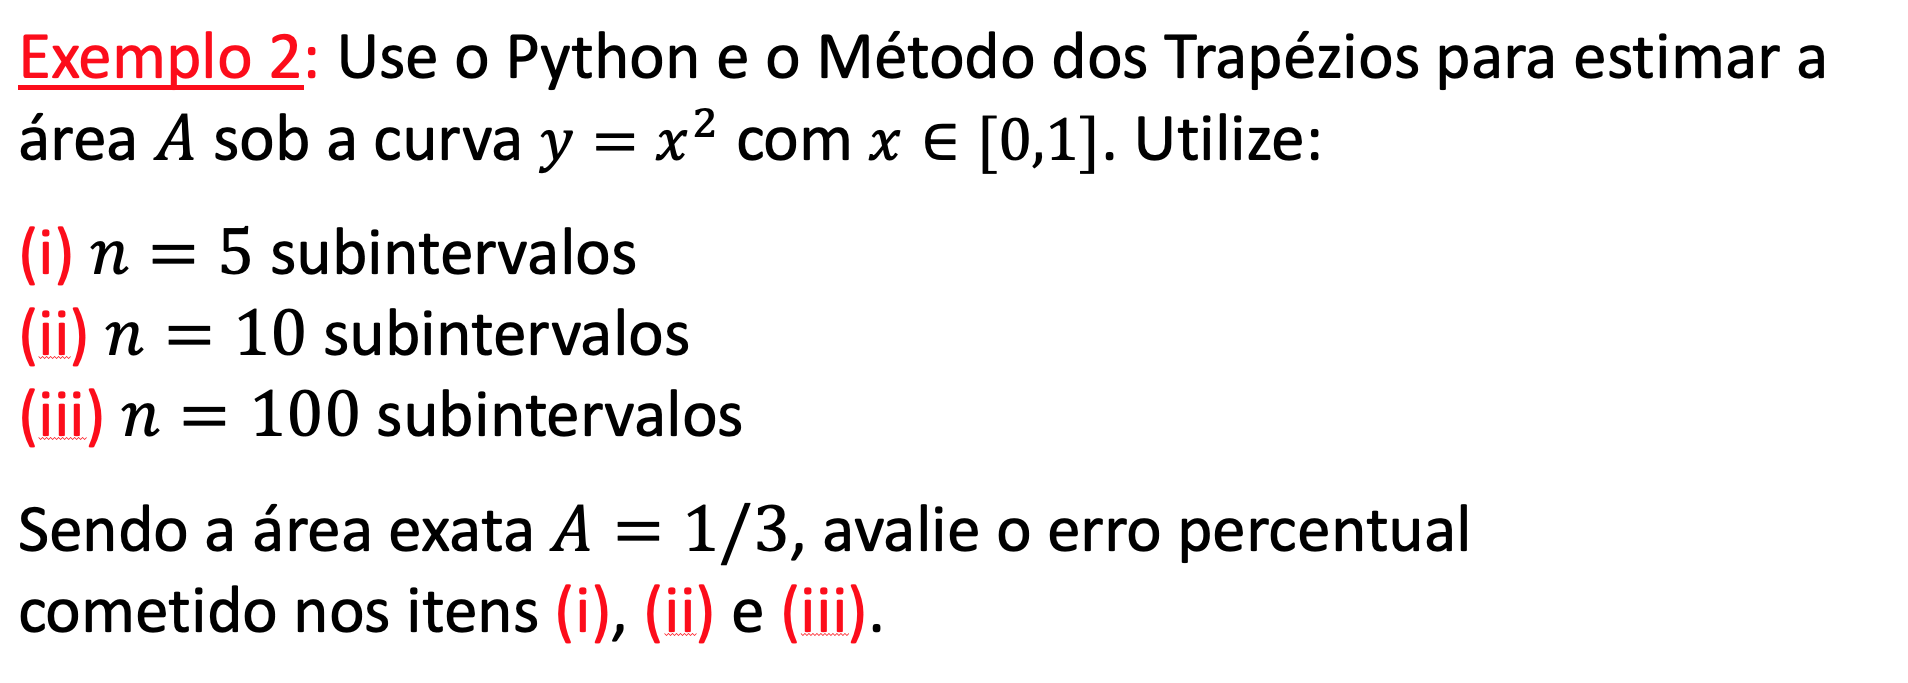

### Método matemático

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import trapz

# Função que representa a curva y = x^2
def f(x):
    return x**2

# Função para calcular a área usando o método dos trapézios
def metodo_trapezios(f, a, b, n):
    # Criando os pontos no intervalo
    x = np.linspace(a, b, n + 1)  # n+1 pontos para n subintervalos
    y = f(x)
    return np.trapz(y, x)

# Parâmetros
a, b = 0, 1  # Intervalo de integração
n_values = [5, 10, 100]  # Quantidades de subintervalos
area_exata = 1/3  # Área exata sob a curva

# Calculando a área e o erro percentual para cada valor de n
resultados_trapezios = []
for n in n_values:
    area_aproximada = metodo_trapezios(f, a, b, n)
    erro_percentual = abs((area_aproximada - area_exata) / area_exata) * 100
    resultados_trapezios.append((n, area_aproximada, erro_percentual))

# Criando DataFrame para exibir os resultados
df_trapezios = pd.DataFrame(resultados_trapezios, columns=['n (subintervalos)', 'Área Aproximada', 'Erro Percentual (%)'])

# Exibindo os resultados diretamente no console
print(df_trapezios)

   n (subintervalos)  Área Aproximada  Erro Percentual (%)
0                  5          0.34000                2.000
1                 10          0.33500                0.500
2                100          0.33335                0.005


## Exercícios

### Exercício 1: Estimar a área de um perfil de velocidade de um veículo
**Descrição**: Imagine que você está desenvolvendo um software de análise de dados para veículos autônomos. Um aspecto importante é calcular a área sob a curva da velocidade para determinar a distância percorrida. Considere que a velocidade $ v(t) $ de um veículo varia ao longo do tempo segundo a função $ v(t) = 3t^2 + 2t + 1 $ no intervalo de tempo $ t \in [0, 3] $.

**Enunciado**:
Calcule a distância total percorrida pelo veículo usando:
1. O método dos trapézios com $ n = 5, 10 $ e $ 20 $ subintervalos.
2. A soma de Riemann com $ n = 5, 10 $ e $ 20 $ retângulos.
3. Compare o valor aproximado com a área exata calculada com SymPy.

**Dicas**:
- Defina a função $ v(t) = 3t^2 + 2t + 1 $.
- Use um valor de referência para a integral exata e calcule o erro percentual.



In [10]:
# Seu código

### Exercício 2: Cálculo da carga elétrica acumulada em um circuito
**Descrição**: Para um sistema elétrico, a carga acumulada em um capacitor ao longo do tempo $ Q(t) $ é dada pela integral da corrente $ I(t) $. A corrente varia conforme a função $ I(t) = 5\sin(t) + 3 $ no intervalo $ t \in [0, \pi] $. Você precisa estimar a carga acumulada ao longo desse intervalo para avaliar a capacidade do capacitor.

**Enunciado**:
Usando a função $ I(t) = 5\sin(t) + 3 $, estime a carga acumulada:
1. Pelo método dos trapézios, com $ n = 5, 10 $ e $ 50 $ subintervalos.
2. Pela soma de Riemann, com $ n = 5, 10 $ e $ 50 $ retângulos.
3. Compare com a área exata utilizando o SymPy e avalie o erro percentual em cada caso.

**Dicas**:
- Defina a função $ I(t) $ e calcule a integral exata para referência.
- A área sob a curva representa a carga elétrica acumulada.

In [11]:
# Seu código

### Exercício 3: Cálculo do trabalho realizado por uma força variável
**Descrição**: Em um projeto de análise mecânica, você está simulando o trabalho realizado por uma força variável. O trabalho $ W $ é a integral da força $ F(x) = 4x^3 - 2x + 1 $ ao longo do deslocamento $ x $. Calcule o trabalho total realizado no intervalo $ x \in [0, 2] $.

**Enunciado**:
Usando a função $ F(x) = 4x^3 - 2x + 1 $, estime o trabalho realizado:
1. Pelo método dos trapézios com $ n = 5, 10 $ e $ 20 $ subintervalos.
2. Pela soma de Riemann com $ n = 5, 10 $ e $ 20 $ retângulos.
3. Use o valor da integral exata para calcular o erro percentual para cada caso.

**Dicas**:
- Defina a função $ F(x) $ e utilize as abordagens mencionadas.
- A integral exata pode ser obtida usando SymPy para comparação.

### Estrutura de Implementação:
Para cada um desses exercícios, recomendo que os alunos sigam este modelo:

1. **Definir a função** (como `f(x)` ou `f(t)`).
2. **Implementar os métodos** para a soma de Riemann e o método dos trapézios.
3. **Calcular a área exata** com SymPy.
4. **Comparar os resultados** e calcular o erro percentual.
5. **Analisar o impacto** do número de subintervalos na precisão dos métodos.

In [12]:
# Seu código